# Model Training

### Importing required packages

In [1]:
import numpy as np
import scipy
import pandas as pd
import random 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR 
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor


### Importing data

In [2]:
df = pd.read_csv('data/body_fat.csv')

### Show top 5 records 

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Adding BMI Column

In [4]:
df['BMI'] = (df['Weight'] * 703) / (df['Height'] * df['Height'])

In [5]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


### Removing Outliers

In [6]:
outlier_indices = {30, 38, 40, 41, 85, 215}

In [7]:
df = df.drop(outlier_indices)
df.reset_index(inplace = True, drop=True)
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


### Creating feature and target matrix 

In [8]:
X_df = df.drop(columns = ['BodyFat'])
y_df = df['BodyFat']

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X_df, y_df, test_size=0.2, random_state=42)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [13]:
print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (196, 15)
Shape of y_train = (196,)
Shape of X_test = (50, 15)
Shape of y_test = (50,)


### Evaluation 

In [14]:
def evaluate_model(true_values, predicted_values):
    mae = mean_absolute_error(y_true=true_values, y_pred=predicted_values)
    rmse = root_mean_squared_error(y_true=true_values, y_pred=predicted_values)
    r2 = r2_score(y_true=true_values, y_pred=predicted_values)
    return mae, rmse, r2 

### Models

In [15]:
def model_training(model_name, regressor):
    regressor.fit(X_train, y_train)
    
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    train_mae, train_rmse, train_r2 = evaluate_model(true_values=y_train, predicted_values=y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(true_values=y_test, predicted_values=y_test_pred)
    
    print(model_name)
    print('-'*30)
    print('Performance on training set')
    print(f'MAE : {train_mae}')
    print(f'RMSE : {train_rmse}')
    print(f'R2 Score : {train_r2}')
    print()
    
    print('Performance on test set')
    print(f'MAE : {test_mae}')
    print(f'RMSE : {test_rmse}')
    print(f'R2 Score : {test_r2}')
    return test_mae, test_rmse, test_r2
    

In [16]:
model_r2_score = {}

#### 1. Linear Regression

In [17]:
model_name = 'Linear Regression'
model = LinearRegression()
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Linear Regression
------------------------------
Performance on training set
MAE : 0.6195008662778867
RMSE : 1.3362154024288464
R2 Score : 0.9720319359068618

Performance on test set
MAE : 0.5313664117482313
RMSE : 0.6925707022626121
R2 Score : 0.9930453067439953


In [18]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2', cv=5))

0.9506938276836469

In [19]:
model_r2_score['Linear Regression'] = test_r2

#### 2. Ridge

In [20]:
model = Ridge()
param_distributions = {
    'alpha' : scipy.stats.loguniform(0.0001, 1000.0)
}
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 100)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001450696F8E0>},
                   random_state=42, scoring='r2', verbose=2)

In [21]:
rs.best_score_

0.9533305012677902

In [22]:
rs.best_params_

{'alpha': 4.341661800361734}

In [23]:
model = rs.best_estimator_
model_name = 'Ridge'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Ridge
------------------------------
Performance on training set
MAE : 0.7477560032919791
RMSE : 1.3753478080074237
R2 Score : 0.9703698030368282

Performance on test set
MAE : 0.6225663435457883
RMSE : 0.7853254057230381
R2 Score : 0.9910577039659131


In [24]:
model_r2_score['Ridge Regression'] = test_r2

In [25]:
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131}

#### 3. Lasso 

In [26]:
model = Lasso()
param_distributions = {
    'alpha' : scipy.stats.loguniform(0.0001, 1000.0)
}
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 100)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=Lasso(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508A98910>},
                   random_state=42, scoring='r2', verbose=2)

In [27]:
rs.best_score_

0.9546762143265777

In [28]:
rs.best_params_

{'alpha': 0.12052231254145616}

In [29]:
model = rs.best_estimator_
model_name = 'Lasso'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Lasso
------------------------------
Performance on training set
MAE : 0.5968408806410386
RMSE : 1.3886308203999858
R2 Score : 0.9697947065458978

Performance on test set
MAE : 0.457924465282894
RMSE : 0.5551422030344169
R2 Score : 0.995531536267414


In [30]:
model_r2_score['Lasso Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131,
 'Lasso Regression': 0.995531536267414}

#### 4. ElasticNet

In [31]:
model = ElasticNet()
param_distributions = {
    'alpha' : scipy.stats.loguniform(0.0001, 1000.0),
    'l1_ratio' : scipy.stats.uniform(0.0, 1.0)
}
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 100)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014506A2BBB0>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014506A2AF80>},
                   random_state=42, scoring='r2', verbose=2)

In [32]:
rs.best_score_

0.9552629511292581

In [33]:
rs.best_params_

{'alpha': 0.15577217702693022, 'l1_ratio': 0.7851759613930136}

In [34]:
model = rs.best_estimator_
model_name = 'ElasticNet'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

ElasticNet
------------------------------
Performance on training set
MAE : 0.8197216586369089
RMSE : 1.436514657006597
R2 Score : 0.9676756662491126

Performance on test set
MAE : 0.6919959891158531
RMSE : 0.8503515963387244
R2 Score : 0.9895155220413382


In [35]:
model_r2_score['ElasticNet Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131,
 'Lasso Regression': 0.995531536267414,
 'ElasticNet Regression': 0.9895155220413382}

#### 5. Support Vector Regression

In [56]:
model = SVR()
param_distributions = [
    {
        'kernel' : ['linear'],
        'degree' : [1, 2, 3, 4, 5],
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    {
        'kernel' : ['rbf', 'poly', 'sigmoid'],
        'gamma'  : ['scale','auto'],
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    {
        'kernel' : ['rbf', 'poly', 'sigmoid'],
        'gamma'  : scipy.stats.loguniform(0.0001, 1000.0),
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    
]
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 1000)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(estimator=SVR(), n_iter=1000, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508B211B0>,
                                         'degree': [1, 2, 3, 4, 5],
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508B23820>,
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf', 'poly', 'sigmoid']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508B23C40>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508B21930>,
                                         'kernel': ['rbf', 'poly', 'sigmoid']}],
                   random_state=42, scoring='r2', verbose=2)

In [57]:
rs.best_score_

0.9671509396464103

In [58]:
rs.best_params_

{'C': 30.01887911534244, 'gamma': 0.003934566797826597, 'kernel': 'rbf'}

In [59]:
model = rs.best_estimator_
model_name = 'SVR'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

SVR
------------------------------
Performance on training set
MAE : 0.3217348575017749
RMSE : 1.2734548101986949
R2 Score : 0.9745974955812622

Performance on test set
MAE : 0.18983943371553566
RMSE : 0.3030749556188927
R2 Score : 0.9986681667631254


In [39]:
model_r2_score['Support Vector Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131,
 'Lasso Regression': 0.995531536267414,
 'ElasticNet Regression': 0.9895155220413382,
 'Support Vector Regression': 0.9986681667631254}

#### 6. K Nearest Neighbors Regression 

In [40]:
model = KNeighborsRegressor()
param_distributions = [
    {
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights'     : ['uniform', 'distance'],
        'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    
]
gs = GridSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='r2', verbose=2)

In [41]:
gs.best_score_

0.7835921988498283

In [42]:
gs.best_params_

{'algorithm': 'brute', 'n_neighbors': 4, 'weights': 'distance'}

In [43]:
model = gs.best_estimator_
model_name = 'K Nearest Neighbors Regression'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

K Nearest Neighbors Regression
------------------------------
Performance on training set
MAE : 5.616749739036923e-08
RMSE : 1.8028271298507458e-07
R2 Score : 0.9999999999999994

Performance on test set
MAE : 2.7261949975848823
RMSE : 3.240804341292852
R2 Score : 0.8477156155283805


In [44]:
model_r2_score['K Nearest Neighbors Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131,
 'Lasso Regression': 0.995531536267414,
 'ElasticNet Regression': 0.9895155220413382,
 'Support Vector Regression': 0.9986681667631254,
 'K Nearest Neighbors Regression': 0.8477156155283805}

#### 7. Random Forest Regressor

In [45]:
model = RandomForestRegressor()
param_distributions = [
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'max_features' : ['sqrt', 'log2', None]
    },
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [None],
        'max_features' : ['sqrt', 'log2', None]
    }   
]
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 200)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions=[{'criterion': ['squared_error',
                                                       'absolute_error',
                                                       'friedman_mse',
                                                       'poisson'],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                                        {'criterion': ['squared_error',
                                                       'absolute_error',
                                                       'friedman_mse',
                                                       'poisson'],
                                         'max_depth': [None],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]}],
                   random_state=42, scoring='r2', verbose=2)

In [46]:
rs.best_score_

0.9650108665656818

In [47]:
rs.best_params_

{'n_estimators': 97,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [48]:
model = rs.best_estimator_
model_name = 'Random Forest Regression'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Random Forest Regression
------------------------------
Performance on training set
MAE : 0.17509993688197067
RMSE : 0.5773483774681121
R2 Score : 0.9947786193128583

Performance on test set
MAE : 0.19387628865979387
RMSE : 0.3480917110515495
R2 Score : 0.9982431401744416


In [49]:
model_r2_score['Random Forest Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131,
 'Lasso Regression': 0.995531536267414,
 'ElasticNet Regression': 0.9895155220413382,
 'Support Vector Regression': 0.9986681667631254,
 'K Nearest Neighbors Regression': 0.8477156155283805,
 'Random Forest Regression': 0.9982431401744416}

#### 8. XGBoost Regressor

In [50]:
model = XGBRegressor()
param_distributions = [
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'subsample'    : scipy.stats.uniform(0.0, 1.0),
        'colsample_bytree' : scipy.stats.uniform(0.0, 1.0),
        'max_features' : ['sqrt', 'log2', None],
        'learning_rate': scipy.stats.loguniform(0.0001, 10.0)
    },
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [None],
        'max_features' : ['sqrt', 'log2', None],
        'subsample'    : scipy.stats.uniform(0.0, 1.0),
        'colsample_bytree' : scipy.stats.uniform(0.0, 1.0),
        'learning_rate': scipy.stats.loguniform(0.0001, 10.0)
    }   
]
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 200)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [ 8.88974480e-01  9.09100894e-01 -9.09697412e-03  1.14427236e-01
 -1.82853522e-02 -2.02722337e+03  2.01451492e-01  7.28631502e-01
  9.07197637e-01 -5.13751659e-01  9.48817752e-01  8.34854892e-01
  3.82275086e-01  9.35641246e-01 -8.89548015e-03 -8.56499326e+43
  2.46323330e-01 -4.64156159e-03  9.60451174e-01  7.94960249e-01
  2.95500226e-01  1.73522856e-01 -7.16997624e+19 -4.92047092e-03
  7.39307551e-01  3.25319172e-01  3.21225398e-03             nan
  9.50408856e-01  8.44635013e-01  1.49095275e-01  2.01798430e-02
 -2.21593317e-02  9.60949875e-01  9.45485330e-01  8.91740829e-01
  8.74701876e-01  7.02875669e-01  2.92848722e-01  7.02187057e-01
  9.39514826e-01  2.75398377e-01             nan  9.60582868e-01
  1.14793791e-01  6.03788694e-01  8.98390047e-01  7.30725042e-01
  2.60550219e-01  1.22043471e-01 -2.424107

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                         'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508B214B0>,
                                         'max_depth': [None],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...],
                                         'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014508B22560>}],
                   random_state=42, scoring='r2', verbose=2)

In [51]:
rs.best_score_

0.9609498753261156

In [52]:
rs.best_params_

{'colsample_bytree': 0.9821683433294356,
 'criterion': 'poisson',
 'learning_rate': 0.0444890253806617,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 129,
 'subsample': 0.09310276780589921}

In [53]:
model = rs.best_estimator_
model_name = 'XG Boost Regression'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

XG Boost Regression
------------------------------
Performance on training set
MAE : 0.642505592229415
RMSE : 1.2351968511057825
R2 Score : 0.9761008854498646

Performance on test set
MAE : 0.6375588779449459
RMSE : 0.7786185935714572
R2 Score : 0.9912097892134395


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [09:58:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


In [54]:
model_r2_score['XG Boost Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.9930453067439953,
 'Ridge Regression': 0.9910577039659131,
 'Lasso Regression': 0.995531536267414,
 'ElasticNet Regression': 0.9895155220413382,
 'Support Vector Regression': 0.9986681667631254,
 'K Nearest Neighbors Regression': 0.8477156155283805,
 'Random Forest Regression': 0.9982431401744416,
 'XG Boost Regression': 0.9912097892134395}

### R2 Scores for different models

In [60]:
model_r2_score_list = []
for model in model_r2_score:
    model_r2_score_list.append([model, model_r2_score[model]])
r2_score_df = pd.DataFrame(model_r2_score_list, columns=['Model Name', 'R2 Score Value']).sort_values(by='R2 Score Value', ascending=False, ignore_index=True)
r2_score_df

,Model Name,R2 Score Value
0,Support Vector Regression,0.998668
1,Random Forest Regression,0.998243
2,Lasso Regression,0.995532
3,Linear Regression,0.993045
4,XG Boost Regression,0.991210
5,Ridge Regression,0.991058
6,ElasticNet Regression,0.989516
7,K Nearest Neighbors Regression,0.847716


### Best Model - SVR

In [61]:
model = SVR(kernel = 'rbf',
            C = 30.01887911534244,
            gamma = 0.003934566797826597)
model_name = 'SVR_'
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 score = {r2_score(y_test, y_pred)}')

R2 score = 0.9986681667631254


### We get an R2 score of 0.9987 on test data when density data is available

Text(0, 0.5, 'Predicted Values')

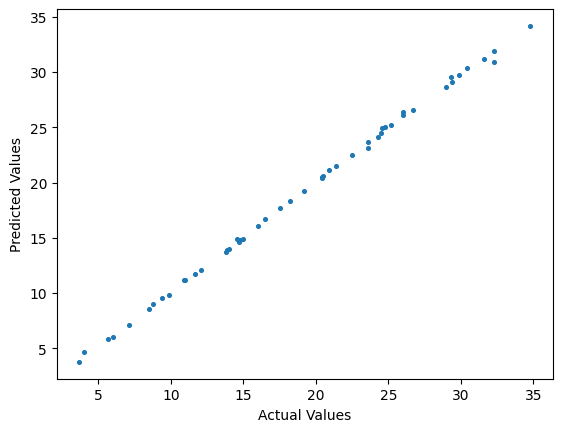

In [65]:
plt.scatter(y_test, y_pred, s=7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [66]:
results_df = pd.DataFrame(
    {
        'Actual value' : y_test,
        'Predicted value' : y_pred,
        'Difference' : abs(y_test - y_pred)
    }
)
results_df

,Actual value,Predicted value,Difference
0,32.3,30.869885,1.430115
1,19.2,19.261788,0.061788
2,23.6,23.639197,0.039197
3,18.2,18.312700,0.112700
4,9.4,9.525424,0.125424
5,12.1,12.078455,0.021545
6,23.6,23.101797,0.498203
7,21.4,21.502699,0.102699
8,11.7,11.718232,0.018232
9,29.9,29.711933,0.188067
